<a href="https://colab.research.google.com/github/mrzResearchArena/TF-2.X/blob/master/Linear-Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
    %tensorflow_version 2.x  # Colab only.
except Exception:
    pass

import tensorflow as tf
import sklearn
import numpy as np
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.1.0-rc1


In [0]:
from sklearn.datasets import load_breast_cancer 
D = load_breast_cancer()

In [4]:
D.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
X = D['data']
# X.shape # --> (569, 30)
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
Y = D['target']
# Y.shape # --> (569,)
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
# from sklearn.utils import shuffle
X, Y = sklearn.utils.shuffle(X, Y)
Y

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,

In [0]:
def Label(Y):
    v = np.zeros(shape=(len(Y), len(set(Y))))
    for i in range(len(Y)):
        v[i, Y[i]] = 1
    
    return v


In [9]:
Y = Label(Y)
Y

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [10]:
D['target_names'] # malignant --> 0 and benign --> 1

array(['malignant', 'benign'], dtype='<U9')

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler
z = StandardScaler()

X_train = z.fit_transform(X_train)
X_test = z.transform(X_test)

In [13]:
N, D = X_train.shape
print(N, D)

381 30


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D)),
    tf.keras.layers.Dense(units=2, activation='softmax')                             
])

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
)

In [16]:
result = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=200)

Train on 381 samples, validate on 188 samples
Epoch 1/200
381/381 [==============================] - 2s 5ms/sample - loss: 0.8325 - accuracy: 0.5564 - val_loss: 0.6622 - val_accuracy: 0.6489
Epoch 2/200
381/381 [==============================] - 0s 128us/sample - loss: 0.7160 - accuracy: 0.6535 - val_loss: 0.5567 - val_accuracy: 0.7074
Epoch 3/200
381/381 [==============================] - 0s 135us/sample - loss: 0.6183 - accuracy: 0.7297 - val_loss: 0.4805 - val_accuracy: 0.7819
Epoch 4/200
381/381 [==============================] - 0s 118us/sample - loss: 0.5439 - accuracy: 0.7717 - val_loss: 0.4230 - val_accuracy: 0.8191
Epoch 5/200
381/381 [==============================] - 0s 118us/sample - loss: 0.4883 - accuracy: 0.7979 - val_loss: 0.3782 - val_accuracy: 0.8670
Epoch 6/200
381/381 [==============================] - 0s 124us/sample - loss: 0.4392 - accuracy: 0.8294 - val_loss: 0.3459 - val_accuracy: 0.8777
Epoch 7/200
381/381 [==============================] - 0s 121us/sample - l

In [0]:
Yp = model.predict(X_test)

In [20]:
print('Training Accuracy: {}'.format(model.evaluate(X_train, Y_train)))
print('Testing Accuracy: {}'.format(model.evaluate(X_test, Y_test)))

# # Evaluate the model - evaluate() returns loss and accuracy
# print("Train score:", model.evaluate(X_train, Y_train))
# print("Test score:", model.evaluate(X_test, Y_test))

381/381 [==============================] - 0s 73us/sample - loss: 0.0623 - accuracy: 0.9843
Training Accuracy: [0.062254386565347354, 0.984252]
188/188 [==============================] - 0s 85us/sample - loss: 0.0668 - accuracy: 0.9787
Testing Accuracy: [0.06679794588621626, 0.9787234]


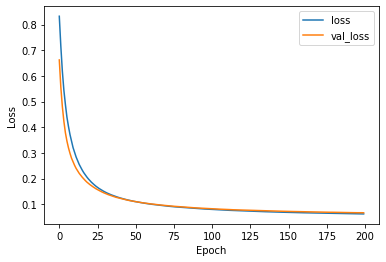

In [21]:
import matplotlib.pyplot as plt
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

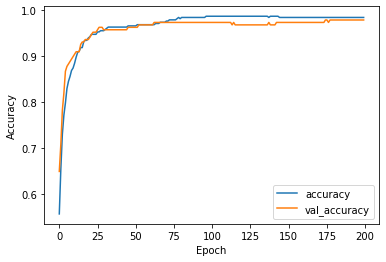

In [22]:
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 62        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [24]:
Yp

array([[5.82247121e-05, 9.99941826e-01],
       [8.23037117e-05, 9.99917746e-01],
       [8.89319718e-01, 1.10680267e-01],
       [3.61241182e-05, 9.99963880e-01],
       [9.99999285e-01, 6.74969840e-07],
       [9.99989033e-01, 1.09649964e-05],
       [1.00000000e+00, 1.83691782e-08],
       [9.94582474e-01, 5.41755464e-03],
       [5.38371736e-03, 9.94616330e-01],
       [9.96864080e-01, 3.13599384e-03],
       [1.26763619e-02, 9.87323701e-01],
       [9.99996662e-01, 3.35988807e-06],
       [1.95312896e-04, 9.99804676e-01],
       [1.92528329e-04, 9.99807537e-01],
       [3.19279805e-02, 9.68071997e-01],
       [9.99850631e-01, 1.49314234e-04],
       [1.00000000e+00, 1.31269351e-08],
       [9.99999881e-01, 7.44489057e-08],
       [1.13607617e-04, 9.99886394e-01],
       [9.06927407e-01, 9.30725709e-02],
       [9.97294366e-01, 2.70567043e-03],
       [9.99999523e-01, 4.82354380e-07],
       [5.05392563e-06, 9.99994993e-01],
       [6.20933366e-04, 9.99379039e-01],
       [9.860998

In [42]:
# v = np.argmax(Yp, axis=1, keepdims=True)
# v
v = np.round(Yp)

C = 0
for real, pred in zip(Y_test, v):
    if real[0] == pred[0] and real[1] == pred[1]:
        C += 1

print(C/len(v)) 

0.9787234042553191


array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [39]:
u = np.array([0, 1], dtype=np.float)
v = np.array([0, 1], dtype=np.float)
print(u, v)

[0. 1.] [0. 1.]


In [40]:
u == v

array([ True,  True])